In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
traffic = pd.read_csv(r"website_wata.csv")

In [4]:
traffic.head()

,Page Views,Session Duration,Bounce Rate,Traffic Source,Time on Page,Previous Visits,Conversion Rate
0,5,11.051381,0.230652,Organic,3.890460,3,1.0
1,4,3.429316,0.391001,Social,8.478174,0,1.0
2,4,1.621052,0.397986,Organic,9.636170,2,1.0
3,5,3.629279,0.180458,Organic,2.071925,3,1.0
4,5,4.235843,0.291541,Paid,1.960654,5,1.0


In [5]:
traffic.tail()

,Page Views,Session Duration,Bounce Rate,Traffic Source,Time on Page,Previous Visits,Conversion Rate
1995,1,2.724513,0.207187,Referral,1.324206,2,1.0
1996,3,0.392856,0.095559,Organic,3.824416,1,1.0
1997,4,9.899823,0.446622,Organic,1.288675,1,1.0
1998,3,0.393319,0.278340,Paid,5.037584,2,1.0
1999,3,0.882638,0.338026,Direct,5.186908,3,1.0


# Descriptive Analysis

In [6]:
traffic.describe()

,Page Views,Session Duration,Bounce Rate,Time on Page,Previous Visits,Conversion Rate
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,4.950500,3.022045,0.284767,4.027439,1.978500,0.982065
std,2.183903,3.104518,0.159781,2.887422,1.432852,0.065680
min,0.000000,0.003613,0.007868,0.068515,0.000000,0.343665
25%,3.000000,0.815828,0.161986,1.935037,1.000000,1.000000
50%,5.000000,1.993983,0.266375,3.315316,2.000000,1.000000
75%,6.000000,4.197569,0.388551,5.414627,3.000000,1.000000
max,14.000000,20.290516,0.844939,24.796182,9.000000,1.000000


# Data Exploration

In [7]:
traffic.shape

(2000, 7)

In [8]:
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Page Views        2000 non-null   int64  
 1   Session Duration  2000 non-null   float64
 2   Bounce Rate       2000 non-null   float64
 3   Traffic Source    2000 non-null   object 
 4   Time on Page      2000 non-null   float64
 5   Previous Visits   2000 non-null   int64  
 6   Conversion Rate   2000 non-null   float64
dtypes: float64(4), int64(2), object(1)
memory usage: 109.5+ KB


In [9]:
traffic.columns = traffic.columns.str.replace(" ","_")

In [10]:
traffic.columns = traffic.columns.str.lower()

In [11]:
traffic

,page_views,session_duration,bounce_rate,traffic_source,time_on_page,previous_visits,conversion_rate
0,5,11.051381,0.230652,Organic,3.890460,3,1.0
1,4,3.429316,0.391001,Social,8.478174,0,1.0
2,4,1.621052,0.397986,Organic,9.636170,2,1.0
3,5,3.629279,0.180458,Organic,2.071925,3,1.0
4,5,4.235843,0.291541,Paid,1.960654,5,1.0
...,...,...,...,...,...,...,...
1995,1,2.724513,0.207187,Referral,1.324206,2,1.0
1996,3,0.392856,0.095559,Organic,3.824416,1,1.0
1997,4,9.899823,0.446622,Organic,1.288675,1,1.0
1998,3,0.393319,0.278340,Paid,5.037584,2,1.0


In [12]:
traffic.columns
column_name = ['page_views', 'session_duration', 'bounce_rate', 'traffic_source',
       'time_on_page', 'previous_visits', 'conversion_rate']

In [13]:
for i in column_name:
    print(traffic[i].unique())

[ 5  4  3  6  7  2  1 11  8 10  9  0 12 14 13]
[11.05138124  3.4293157   1.62105205 ...  9.89982324  0.39331928
  0.88263788]
[0.23065194 0.39100133 0.39798611 ... 0.44662223 0.27834022 0.33802552]
['Organic' 'Social' 'Paid' 'Direct' 'Referral']
[3.89046007 8.47817449 9.63616963 ... 1.28867457 5.03758387 5.18690764]
[3 0 2 5 1 4 6 7 8 9]
[1.         0.96307967 0.86859328 0.97227663 0.89285601 0.98400406
 0.96249364 0.74920366 0.90734929 0.62529399 0.79675574 0.86876104
 0.87448433 0.9088357  0.93254546 0.8248028  0.99338291 0.79992917
 0.93747118 0.96273515 0.78059753 0.98980972 0.94934445 0.87516363
 0.83840615 0.8324669  0.52880263 0.50822676 0.92765402 0.90498839
 0.9584078  0.95246614 0.97770552 0.98039738 0.95161159 0.8220336
 0.96131166 0.7642584  0.90874134 0.79845902 0.98717485 0.59703
 0.99618586 0.98018991 0.99836907 0.77533658 0.46848613 0.719286
 0.98272607 0.93283027 0.92605025 0.8019253  0.82001899 0.86869309
 0.86009013 0.51186191 0.97297841 0.71309797 0.99981047 0.90029

In [14]:
traffic.columns

Index(['page_views', 'session_duration', 'bounce_rate', 'traffic_source',
       'time_on_page', 'previous_visits', 'conversion_rate'],
      dtype='object')

In [15]:
traffic['session_duration'] = traffic['session_duration'].round().astype(int)

In [16]:
traffic['bounce_rate'] = (traffic['bounce_rate']* 100).round().astype(int)

In [17]:
traffic['conversion_rate'] = (traffic['conversion_rate']* 100).round().astype(int)

In [18]:
traffic['time_on_page'] = traffic['time_on_page'].round().astype(int)

In [19]:
traffic

,page_views,session_duration,bounce_rate,traffic_source,time_on_page,previous_visits,conversion_rate
0,5,11,23,Organic,4,3,100
1,4,3,39,Social,8,0,100
2,4,2,40,Organic,10,2,100
3,5,4,18,Organic,2,3,100
4,5,4,29,Paid,2,5,100
...,...,...,...,...,...,...,...
1995,1,3,21,Referral,1,2,100
1996,3,0,10,Organic,4,1,100
1997,4,10,45,Organic,1,1,100
1998,3,0,28,Paid,5,2,100


In [20]:
for i in column_name:
    print(traffic[i].unique())

[ 5  4  3  6  7  2  1 11  8 10  9  0 12 14 13]
[11  3  2  4  5  0  8  1  7 14  6 18 12 15  9 10 16 13 20 19 17]
[23 39 40 18 29 42  3 25 12 21 49 45 26 32 30 34 17 64  9  6  1 16 14 44
  8 68 37 15 48 27 13 46 61 19 84 36  5 53 22 65 10 50 54 51 31 24 11  7
 38 28 57 55 20 33  2 59 63  4 56 67 79 70 35 41 43 47 60 78 74 58 69 62
 73 52 71 72 66 80 75]
['Organic' 'Social' 'Paid' 'Direct' 'Referral']
[ 4  8 10  2  3  5  1  6  9 12  7 15 14  0 18 11 13 20 16 17 25]
[3 0 2 5 1 4 6 7 8 9]
[100  96  87  97  89  98  75  91  63  80  93  82  99  94  78  95  88  84
  83  53  51  90  76  60  47  72  86  71  85  73  81  74  34  65  92  56
  70  66  69  79  64  67  55  77  61  68  40  57]


# Identifying key drivers of engagement and conversion.

In [21]:
traffic.corr(numeric_only=True)

,page_views,session_duration,bounce_rate,time_on_page,previous_visits,conversion_rate
page_views,1.000000,-0.012815,0.029735,0.026307,0.028595,0.126693
session_duration,-0.012815,1.000000,-0.013789,-0.012574,-0.023410,0.181927
bounce_rate,0.029735,-0.013789,1.000000,0.039415,-0.016528,-0.047873
time_on_page,0.026307,-0.012574,0.039415,1.000000,-0.027457,0.227923
previous_visits,0.028595,-0.023410,-0.016528,-0.027457,1.000000,0.109777
conversion_rate,0.126693,0.181927,-0.047873,0.227923,0.109777,1.000000


# Analyzing the effectiveness of different traffic sources.

In [31]:
traffic.groupby('traffic_source')[['conversion_rate','bounce_rate']].mean()

,conversion_rate,bounce_rate
traffic_source,,
Direct,97.865741,28.453704
Organic,98.226463,28.185751
Paid,97.911215,29.614486
Referral,98.767442,26.631229
Social,98.263941,29.672862


# Understanding user behavior patterns and optimizing the website accordingly.

In [23]:
traffic[['page_views','session_duration','previous_visits']].describe()

,page_views,session_duration,previous_visits
count,2000.000000,2000.000000,2000.000000
mean,4.950500,3.012500,1.978500
std,2.183903,3.123815,1.432852
min,0.000000,0.000000,0.000000
25%,3.000000,1.000000,1.000000
50%,5.000000,2.000000,2.000000
75%,6.000000,4.000000,3.000000
max,14.000000,20.000000,9.000000


# Improve Marketing Statergies

In [36]:
traffic.groupby('traffic_source').agg({
    'conversion_rate':'mean',
    'session_duration':'mean',
    'bounce_rate':'mean'}).round(2)

,conversion_rate,session_duration,bounce_rate
traffic_source,,,
Direct,97.87,2.69,28.45
Organic,98.23,3.09,28.19
Paid,97.91,2.93,29.61
Referral,98.77,3.11,26.63
Social,98.26,3.07,29.67


In [25]:
traffic.sort_values('bounce_rate').tail()

,page_views,session_duration,bounce_rate,traffic_source,time_on_page,previous_visits,conversion_rate
290,8,1,79,Organic,2,3,96
1265,5,2,80,Social,3,2,100
1243,5,0,84,Social,9,1,100
1311,4,1,84,Organic,4,2,100
50,5,0,84,Organic,1,4,75


In [26]:
traffic.sort_values('time_on_page').head()

,page_views,session_duration,bounce_rate,traffic_source,time_on_page,previous_visits,conversion_rate
1947,1,2,13,Social,0,1,57
373,3,1,31,Organic,0,3,100
826,5,5,32,Social,0,0,100
707,5,6,32,Organic,0,4,100
676,6,2,4,Organic,0,2,100


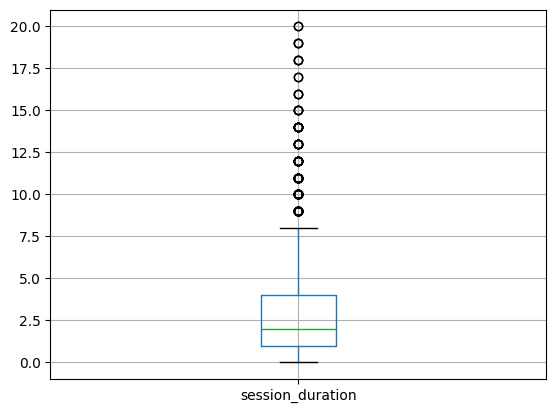

In [27]:
traffic.boxplot(column='session_duration');
plt.show()

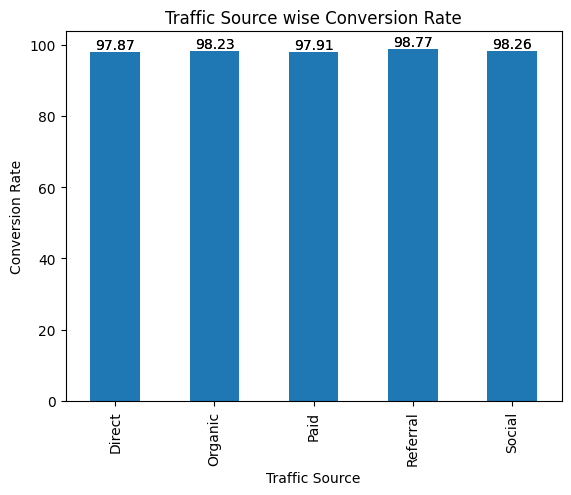

In [38]:
ax = traffic.groupby('traffic_source')['conversion_rate'].mean().plot(kind='bar')

for bar in ax.patches:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f'{height:.2f}',
        ha='center',
        va='bottom'
    )

plt.xlabel('Traffic Source')
plt.ylabel('Conversion Rate')
plt.title('Traffic Source wise Conversion Rate')
plt.show()


In [29]:
traffic

,page_views,session_duration,bounce_rate,traffic_source,time_on_page,previous_visits,conversion_rate
0,5,11,23,Organic,4,3,100
1,4,3,39,Social,8,0,100
2,4,2,40,Organic,10,2,100
3,5,4,18,Organic,2,3,100
4,5,4,29,Paid,2,5,100
...,...,...,...,...,...,...,...
1995,1,3,21,Referral,1,2,100
1996,3,0,10,Organic,4,1,100
1997,4,10,45,Organic,1,1,100
1998,3,0,28,Paid,5,2,100


In [39]:
traffic['conversion_rate'].unique()

array([100,  96,  87,  97,  89,  98,  75,  91,  63,  80,  93,  82,  99,
        94,  78,  95,  88,  84,  83,  53,  51,  90,  76,  60,  47,  72,
        86,  71,  85,  73,  81,  74,  34,  65,  92,  56,  70,  66,  69,
        79,  64,  67,  55,  77,  61,  68,  40,  57])

In [40]:
from sklearn.model_selection import train_test_split

x = traffic.drop(['conversion_rate','traffic_source'],axis=1)
y = traffic['conversion_rate']

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 42)

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression()
model.fit(x_train,y_train)

pred = model.predict(x_test)

print('Accuracy:',accuracy_score(y_test,pred))

Accuracy: 0.91


c:\Users\L E N O V O\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
